In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

from src.visual_clues import VisualClues
from src.image_classifier import InterpretableImageClassifier

In [20]:
# We take 10 dog breeds here
class_domain = 'dog'
class_labels_list = ['Bulldog', 'Scotch Terrier', 'Beagle', 'Chihuahua', 'Saluki', 'Lhasa', 'Clumber', 'Doberman', 'Chow', 'African Hunting Dog']

# We choose the Standford Dogs dataset
image_dir = '../libsearch/stanford-dogs/images/Images'
annotation_dir = '../libsearch/stanford-dogs/annotations/Annotation'

# We use already-generated tree and data_model dataframe (LLMs predictions and image embeddings take time)
visual_clue_tree_path = 'dog_visual_clues_dict_10.json'
data_model_path = 'dog_visual_clues_similarities_10.csv'

In [21]:
visual_clues = VisualClues(
    class_domain = class_domain,
    class_labels_list = class_labels_list,
    visual_clue_tree_path = visual_clue_tree_path
)

In [23]:
visual_clues.get_visual_clues_class_domain_dict()

The file 'dog_visual_clues_dict_10.json' already exists.


In [16]:
visual_clues.class_domain_visual_clues_list

['the length of the fur is long',
 'the length of the tail is medium',
 'the size of the hind legs paws is small',
 'the thickness of the tail is thick',
 'the fur texture of the tail is dense',
 'the claw sharpness of the front_legs paws is moderate',
 'the color of the belly matches body color',
 'the fur color of the back matches body color',
 'the flexibility of the tail is semi-flexible',
 'the size of the front legs paws is small',
 'the softness of the belly is moderate',
 'the flexibility of the tail is moderately flexible',
 'the fur color of the back is tricolor',
 'the shape of the nose is pointed',
 'the length of the neck is medium',
 'the alignment of the eyes is level',
 'the size of the mouth is small',
 'the length of the fur is dense',
 'the texture of the fur is silky',
 'the flexibility of the tail is stiff',
 'the luminosity of the eyes is moderate',
 'the shape of the mouth is wide',
 'the color of the mouth is pink',
 'the size of the ears is medium',
 'the shape

In [15]:
visual_clues.class_domain_dict

{'Bulldog': {'head_eyes_size': 'the size of the eyes is medium',
  'head_eyes_color': 'the color of the eyes is brown',
  'head_eyes_shape': 'the shape of the eyes is round',
  'head_eyes_luminosity': 'the luminosity of the eyes is low',
  'head_eyes_alignment': 'the alignment of the eyes is wide-set',
  'head_ears_size': 'the size of the ears is small',
  'head_ears_shape': 'the shape of the ears is floppy',
  'head_ears_texture': 'the texture of the ears is smooth',
  'head_ears_flexibility': 'the flexibility of the ears is low',
  'head_ears_fur_length': 'the fur length of the ears is short',
  'head_nose_size': 'the size of the nose is medium',
  'head_nose_shape': 'the shape of the nose is rounded',
  'head_nose_color': 'the color of the nose is black',
  'head_nose_texture': 'the texture of the nose is smooth',
  'head_mouth_size': 'the size of the mouth is wide',
  'head_mouth_shape': 'the shape of the mouth is broad',
  'head_mouth_color': 'the color of the mouth is pink',
  'h

In [24]:
visual_clues.get_visual_clues_embeddings()

In [18]:
visual_clues.visual_clues_embeddings

{'the length of the fur is long': tensor([[ 1.9860e-01,  8.8198e-02, -1.4480e-01,  9.0794e-02,  2.2524e-02,
          -1.9287e-01,  2.4467e-01, -3.7780e-01,  4.5070e-02, -6.1059e-01,
           1.3446e-01,  1.6521e-01, -2.9408e-01,  9.8873e-02,  6.3022e-01,
          -3.4468e-01, -1.5719e+00, -3.2016e-02, -5.7157e-01, -2.7775e-01,
           4.0218e-01,  1.5560e-01,  4.7998e-01,  2.8779e-01, -1.3012e-01,
           3.8546e-01, -1.9758e-01,  4.6479e-01,  2.6976e-01, -1.6688e-01,
           2.1889e-01,  1.1354e-01, -3.1305e-01, -2.1840e-01,  3.4091e-01,
          -6.4044e-02,  2.6060e-03,  4.5206e-01,  4.2447e-02,  4.2189e-02,
          -6.9766e-02, -4.8457e-02,  7.4390e-03,  1.2250e-01,  4.5108e-01,
           1.2125e-01, -4.8201e-02,  4.8013e-01,  6.0447e-02,  1.7630e-01,
           5.4600e-02,  6.7692e-02,  3.6352e-01, -1.6294e-01,  4.3225e-01,
          -9.8653e-02, -2.0589e-01, -1.3993e-01,  2.0364e-01,  6.1799e-01,
           4.1582e-01,  3.7025e-02, -3.5400e-01, -2.0799e-01,  1.06

In [52]:
visual_clues.sorted_values_dict

{'head_eyes_size': ['the size of the eyes is small',
  'the size of the eyes is medium'],
 'head_eyes_color': ['the color of the eyes is dark brown',
  'the color of the eyes is brown',
  'the color of the eyes is usually brown'],
 'head_eyes_shape': ['the shape of the eyes is rounded',
  'the shape of the eyes is almond-shaped',
  'the shape of the eyes is round'],
 'head_eyes_luminosity': ['the luminosity of the eyes is normal',
  'the luminosity of the eyes is high',
  'the luminosity of the eyes is low',
  'the luminosity of the eyes is moderate'],
 'head_eyes_alignment': ['the alignment of the eyes is straight forward',
  'the alignment of the eyes is level',
  'the alignment of the eyes is aligned forward',
  'the alignment of the eyes is forward-facing',
  'the alignment of the eyes is wide-set',
  'the alignment of the eyes is forward facing'],
 'head_ears_size': ['the size of the ears is small',
  'the size of the ears is medium',
  'the size of the ears is large'],
 'head_ear

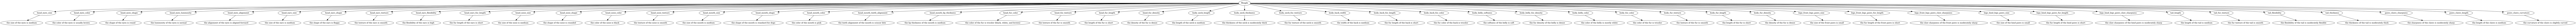

In [19]:
visual_clues.get_class_label_tree_image('Beagle', 'beagle_test')

In [40]:
img_classifier = InterpretableImageClassifier(
    class_domain = class_domain,
    class_labels_list = class_labels_list,
    visual_clues_embeddings = visual_clues.visual_clues_embeddings,
    image_dir = image_dir,
    annotation_dir = annotation_dir,
    class_label_folders = True,
    data_model_path = data_model_path
)    

In [41]:
df_model = img_classifier.create_data_model_df()

The file 'dog_visual_clues_similarities_10.csv' already exists.


In [42]:
df_model

,class_label,image_name,the fur texture of the neck is smooth,the flexibility of the ears is stiff,the fur length of the hind_legs paws is short,the claw sharpness of the hind paws is very sharp,"the color of the fur is red, black, blue, fawn, cream",the claw sharpness of the front paws is very sharp,the luminosity of the eyes is moderate,the texture of the fur is silky,...,the flexibility of the ears is high,the color of the belly matches body color,the fur length of the front legs paws is short,the fur length of the hind paws is short,the sharpness of the claws is moderately sharp,the fur color of the back is black and tan,the thickness of the neck is slender,the fur texture of the neck is dense,the size of the nose is small,the width of the back is moderate
0,Chihuahua,n02085620_3045,0.161216,0.182279,0.167816,0.156847,0.210202,0.178690,0.130356,0.164290,...,0.188311,0.178257,0.185115,0.166756,0.154443,0.155602,0.149541,0.159864,0.168969,0.129423
1,Chihuahua,n02085620_3942,0.203049,0.277777,0.206465,0.205923,0.247919,0.231452,0.178718,0.184020,...,0.271274,0.193573,0.212930,0.212879,0.172582,0.221880,0.198004,0.196799,0.236632,0.151845
2,Chihuahua,n02085620_3402,0.204543,0.255857,0.202277,0.210075,0.211503,0.226324,0.172146,0.200675,...,0.247774,0.195563,0.211799,0.211067,0.189406,0.193076,0.196834,0.199956,0.210314,0.166363
3,Chihuahua,n02085620_4673,0.186748,0.237095,0.166150,0.174659,0.203893,0.209217,0.156406,0.177490,...,0.234361,0.153233,0.192861,0.179573,0.147489,0.196798,0.174412,0.176556,0.219138,0.141336
4,Chihuahua,n02085620_1569,0.207945,0.217640,0.225167,0.163324,0.255428,0.198794,0.156906,0.219534,...,0.217498,0.189914,0.242109,0.220316,0.141943,0.258494,0.182587,0.194198,0.201745,0.161852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,Doberman,n02107142_4632,0.183794,0.263383,0.227447,0.228970,0.228190,0.239728,0.154021,0.166431,...,0.260163,0.179351,0.230375,0.226558,0.212879,0.240472,0.212953,0.175122,0.197908,0.181743
1711,Doberman,n02107142_21,0.198733,0.229712,0.171864,0.166934,0.199631,0.207249,0.168918,0.162366,...,0.232451,0.156867,0.201311,0.176537,0.182993,0.233793,0.208592,0.185120,0.231913,0.162327
1712,Doberman,n02107142_17564,0.185798,0.238111,0.184428,0.184391,0.171251,0.195019,0.137787,0.144199,...,0.245588,0.167113,0.193566,0.173437,0.163351,0.169895,0.247419,0.171782,0.183900,0.154471
1713,Doberman,n02107142_13677,0.179991,0.233249,0.184951,0.205507,0.212963,0.237949,0.122473,0.149957,...,0.233101,0.142607,0.206417,0.190680,0.223564,0.205099,0.208297,0.177320,0.198014,0.155788


In [48]:
img_classifier.fit(select_most_important_features=False)

Accuracy: 0.8837
Precision: 0.8907
Recall: 0.8837
F1 Score: 0.8835
                     precision    recall  f1-score   support

African_hunting_dog       0.82      1.00      0.90        18
          Chihuahua       0.91      0.71      0.80        14
           Doberman       1.00      0.88      0.93         8
     French_bulldog       0.94      0.89      0.91        18
              Lhasa       0.90      0.82      0.86        22
             Saluki       0.94      0.85      0.89        20
     Scotch_terrier       0.75      0.94      0.83        16
             beagle       0.88      0.94      0.91        16
               chow       0.92      0.92      0.92        26
            clumber       0.86      0.86      0.86        14

           accuracy                           0.88       172
          macro avg       0.89      0.88      0.88       172
       weighted avg       0.89      0.88      0.88       172



In [46]:
%debug

> /opt/conda/envs/libsearch/lib/python3.10/site-packages/sklearn/utils/_bunch.py(34)__getitem__()
     32 
     33     def __getitem__(self, key):
---> 34         if key in self.__dict__.get("_deprecated_key_to_warnings", {}):
     35             warnings.warn(
     36                 self._deprecated_key_to_warnings[key],



ipdb>  up


> /home/jupyter/Arthur/interpretable-image-classification/src/image_classifier.py(203)get_most_important_features()
    201 
    202         # we keep the the features that maximizes the accuracy of the model
--> 203         best_features = list(perm_importance[:best_n_features]['Feature'])
    204 
    205         return best_features



ipdb>  perm_importance


{'importances_mean': array([ 0.        , -0.00174419,  0.        ,  0.00406977,  0.        ,
        0.        ,  0.        ,  0.        , -0.0005814 , -0.00116279,
        0.00116279,  0.        ,  0.        ,  0.        ,  0.00116279,
       -0.00290698,  0.0005814 ,  0.        ,  0.00116279,  0.00116279,
       -0.00406977,  0.        ,  0.00232558, -0.00232558,  0.        ,
        0.00232558, -0.00116279,  0.00290698,  0.00174419,  0.00290698,
        0.        ,  0.        ,  0.        ,  0.00465116,  0.00813953,
        0.00116279,  0.        , -0.00232558,  0.        ,  0.        ,
        0.00290698,  0.        , -0.0005814 ,  0.00348837,  0.        ,
        0.        ,  0.00116279,  0.00232558, -0.00813953, -0.00116279,
       -0.0005814 ,  0.        ,  0.00232558,  0.        ,  0.00406977,
        0.00174419,  0.00465116, -0.00174419,  0.00174419,  0.00116279,
        0.00406977,  0.        ,  0.        ,  0.00406977,  0.00232558,
        0.        ,  0.00116279,  0.0029069

ipdb>  list(perm_importance_df[:best_n_features]['Feature']


*** Error in argument: "(perm_importance_df[:best_n_features]['Feature']"


ipdb>  perm_importance_df.head()


                                Feature  Importance  Importance Std
0      the density of the fur is sparse    0.008721        0.006500
1   the shape of the ears is triangular    0.008140        0.004651
2        the length of the neck is long    0.006395        0.003131
3     the width of the back is moderate    0.005814        0.000000
4  the fur texture of the neck is silky    0.005814        0.003677


ipdb>  perm_importance_df[:best_n_features][['Feature']].head()]


*** SyntaxError: unmatched ']'


ipdb>  perm_importance_df[:best_n_features][['Feature']].head()


                                Feature
0      the density of the fur is sparse
1   the shape of the ears is triangular
2        the length of the neck is long
3     the width of the back is moderate
4  the fur texture of the neck is silky


ipdb>  list(perm_importance_df[:best_n_features]['Feature'])


*** Error in argument: "(perm_importance_df[:best_n_features]['Feature'])"


ipdb>  perm_importance_df[:best_n_features]['Feature']


0                       the density of the fur is sparse
1                    the shape of the ears is triangular
2                         the length of the neck is long
3                      the width of the back is moderate
4                   the fur texture of the neck is silky
                             ...                        
181    the claw sharpness of the front paws is modera...
182                   the thickness of the neck is thick
183                    the thickness of the neck is thin
184                        the length of the fur is long
185             the size of the front legs paws is small
Name: Feature, Length: 186, dtype: object


ipdb>  exit



the true class_label is : French_bulldog
the predicted class_label is : French_bulldog


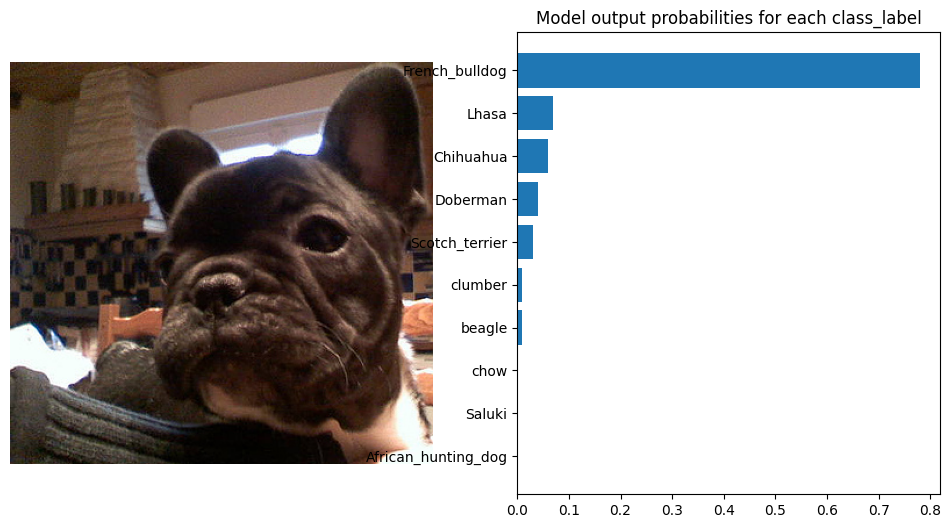

In [50]:
img_classifier.predict(image_name='n02108915-French_bulldog/n02108915_8923')

In [51]:
img_classifier.calculate_feature_importance()

# Model analysis 

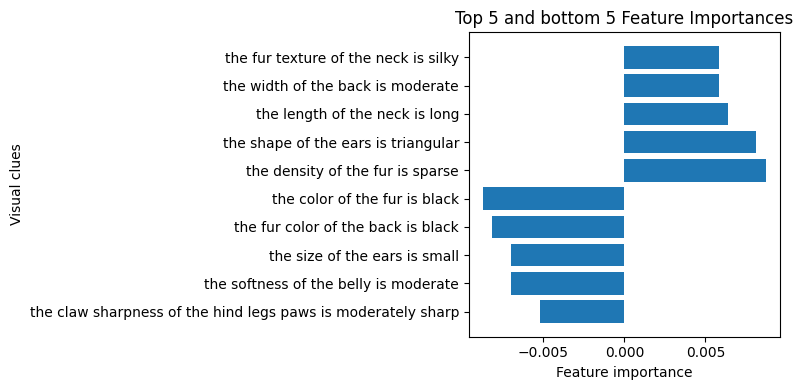

In [55]:
top_10 = img_classifier.perm_importance_df.tail(5)
bottom_10 = img_classifier.perm_importance_df.head(5)

top_and_bottom = pd.concat([top_10, bottom_10])

plt.figure(figsize=(8, 4))
plt.barh(top_and_bottom["Feature"], top_and_bottom["Importance"])
plt.title("Top 5 and bottom 5 Feature Importances")
plt.xlabel("Feature importance")
plt.ylabel("Visual clues")
plt.tight_layout()
plt.show()

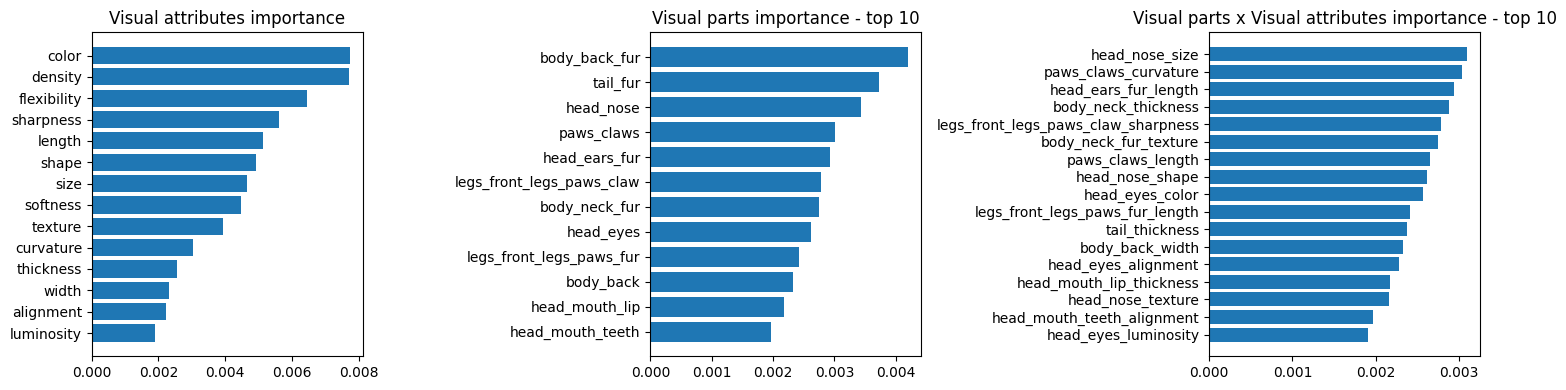

In [56]:
# we rank best visual parts / attributes to classify dogs

def map_to_visual_clue(value):
    for key, values in visual_clues.sorted_values_dict.items():
        if value in values:
            return key
    return None

img_classifier.importance_df['visual_clue'] = img_classifier.importance_df['Feature'].apply(map_to_visual_clue)
img_classifier.importance_df['attribute'] = img_classifier.importance_df['visual_clue'].apply(lambda x: x.split('_')[-1])
img_classifier.importance_df['visual_part'] = img_classifier.importance_df['visual_clue'].apply(lambda x: "_".join(x.split('_')[:-1]))

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

attributes_importance = img_classifier.importance_df.groupby('attribute')['Importance'].mean().sort_values(ascending=True)
axes[0].barh(attributes_importance.index, attributes_importance);
axes[0].set_title('Visual attributes importance');

visual_part_importance = img_classifier.importance_df.groupby('visual_part')['Importance'].mean().sort_values(ascending=True)[:-12]
axes[1].barh(visual_part_importance.index, visual_part_importance);
axes[1].set_title('Visual parts importance - top 10');

visual_clue_importance = img_classifier.importance_df.groupby('visual_clue')['Importance'].mean().sort_values(ascending=True)[:-29]
axes[2].barh(visual_clue_importance.index, visual_clue_importance);
axes[2].set_title('Visual parts x Visual attributes importance - top 10');

plt.tight_layout()

/opt/conda/envs/libsearch/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


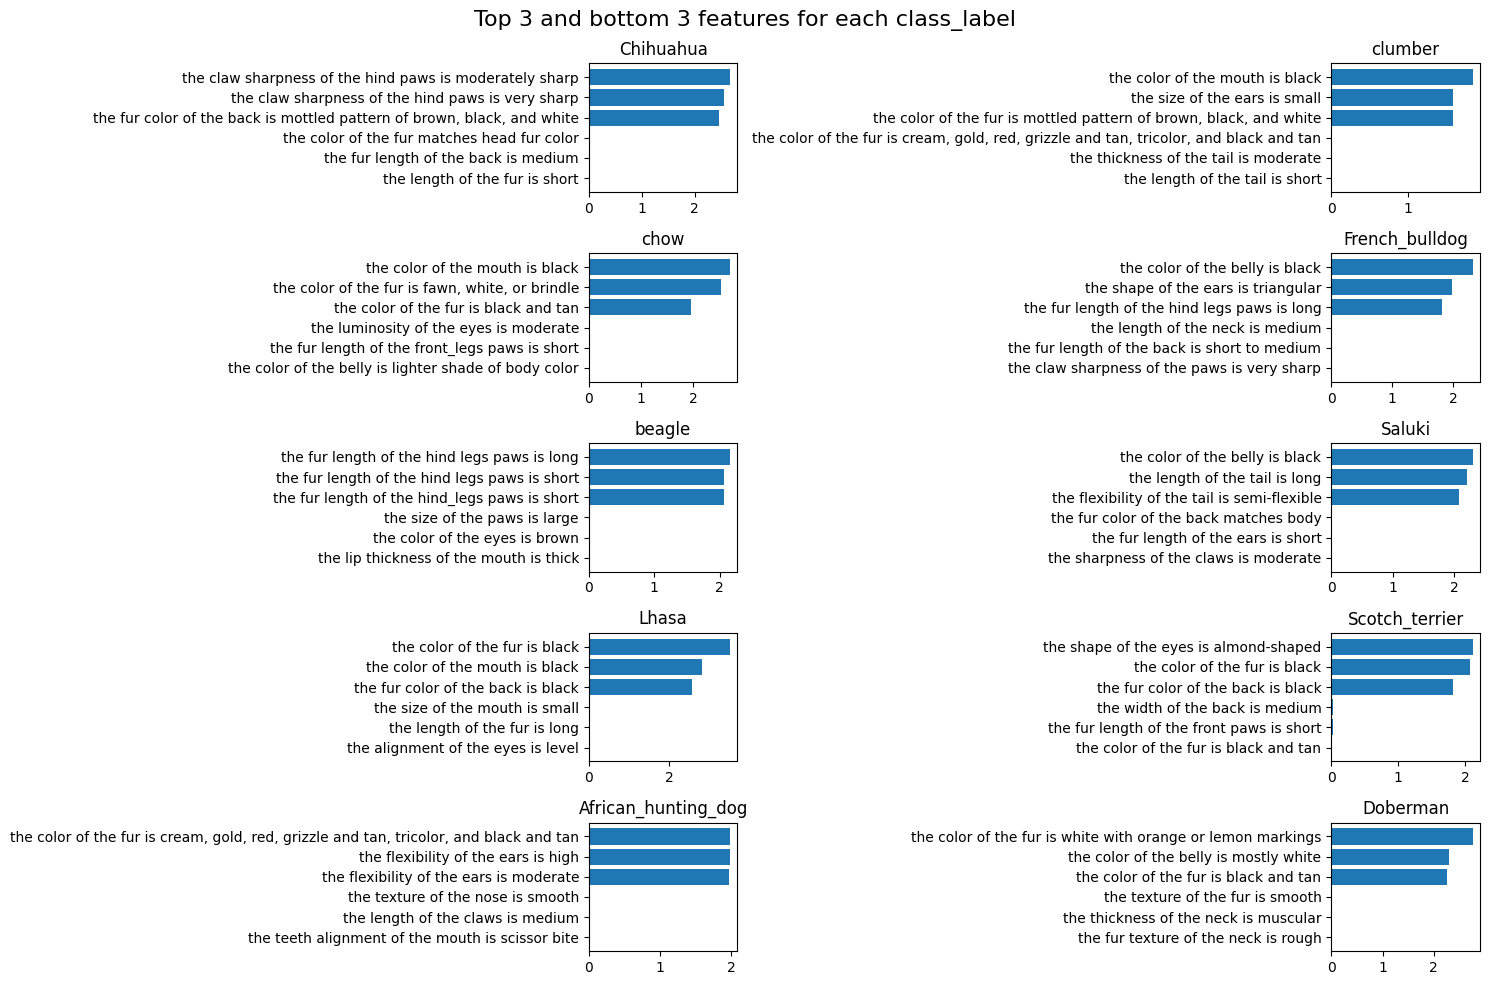

In [67]:
# Focus on feature importance for each class_label
# For that, we need train one vs all logistic regression

ova_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
ova_model.fit(img_classifier.X_train, img_classifier.y_train)

feature_names = img_classifier.X_train.columns
coefficients = ova_model.coef_  # Shape: (n_classes, n_features)

# Convert to DataFrame for easier manipulation
feature_importances = pd.DataFrame(np.abs(coefficients).T,  # Use np.abs() to get absolute values
                                   index=feature_names,
                                   columns=img_classifier.y.unique())

n_classes = len(feature_importances.columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes_flat = axes.flatten()

for i, class_label in enumerate(feature_importances.columns):
    top_features = feature_importances[class_label].nlargest(3)
    bottom_features = feature_importances[class_label].nsmallest(3)

    combined_features = pd.concat([top_features, bottom_features])
    combined_features = combined_features.reindex(combined_features.abs().sort_values(ascending=True).index)

    ax = axes_flat[i]
    ax.barh(combined_features.index, combined_features)
    ax.set_title(f"{class_label}")
    ax.axvline(x=0, color='grey', linewidth=0.5)  # Line at zero for reference

fig.suptitle('Top 3 and bottom 3 features for each class_label', fontsize=16)
plt.tight_layout()
plt.show()

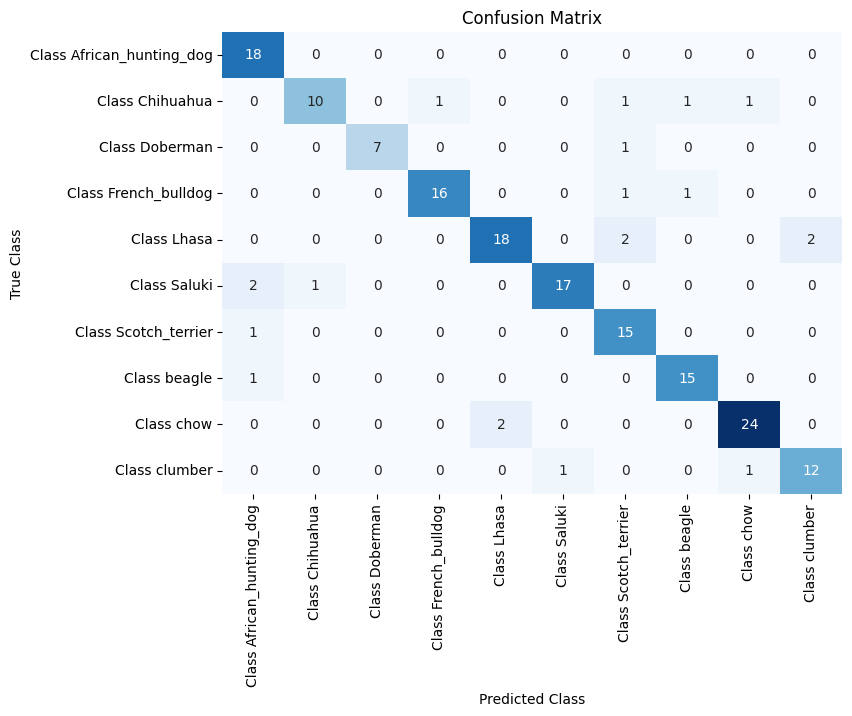

In [65]:
conf_matrix = confusion_matrix(img_classifier.y_test, img_classifier.y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=[f'Class {i}' for i in np.unique(img_classifier.y)],
            yticklabels=[f'Class {i}' for i in np.unique(img_classifier.y)])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [68]:
class_label1 = 'Scotch_terrier'
class_label2 = 'Lhasa'

top_features_class_label1 = feature_importances[class_label1].nlargest(30).index
top_features_class_label2 = feature_importances[class_label2].nlargest(30).index
common_features = top_features_class_label1.intersection(top_features_class_label2)
common_feature_values = feature_importances.loc[common_features, [class_label1, class_label2]]
common_feature_values

,Scotch_terrier,Lhasa
the shape of the eyes is almond-shaped,2.116594,1.528936
the color of the fur is black,2.076491,3.516078
the fur color of the back is black,1.819396,2.561505
the density of the fur is high,1.600871,0.991676
the fur length of the back is short to medium,1.444513,1.030471


In [69]:
img_classifier.X_test_label[(img_classifier.X_test_label.class_label == 'Lhasa')&(img_classifier.X_test_label.pred == 'Scotch_terrier')]

AttributeError: 'DataFrame' object has no attribute 'pred'

In [ ]:
# to get SHAP values, we need to train a dedicated model where target classes are encoded

X_wo_label = df_model.drop(columns=['class_label', 'image_name'])
y = df_model['class_label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

X_wo_label = X_wo_label[img_classifier.most_important_features_list]

X_train, X_test, y_train, y_test = train_test_split(X_wo_label, y_encoded, test_size=0.1, random_state=42)

model_shap = RandomForestClassifier(random_state=42, n_jobs=-1)
model_shap.fit(X_train, y_train)

In [ ]:
label_mapping

In [ ]:
index_focus = 1058
true_class = img_classifier.X_test_label.loc[index_focus, 'class_label']
true_class_encoded = label_mapping[true_class]
pred_class = img_classifier.X_test_label.loc[index_focus, 'pred']
pred_class_encoded = label_mapping[pred_class]

In [ ]:
sample_shap_values_true = shap_values[index_focus, :, true_class_encoded]
sample_shap_values_pred = shap_values[index_focus, :, pred_class_encoded]

base_value_true = explainer.expected_value[true_class_encoded]
base_value_pred = explainer.expected_value[pred_class_encoded]

sample_features = X_wo_label.loc[index_focus,:]
feature_names = X_wo_label.columns if hasattr(X_wo_label, 'columns') else None

feature_names = list(feature_names)
feature_names_reduced = [map_to_visual_clue(feature)+':'+feature.split('is')[1] if 'is' in feature else feature for feature in feature_names]

In [ ]:
print(f"SHAP values for the true label : {true_class}")

shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_values_true,
        base_values=base_value_true,
        feature_names=feature_names,
        data=sample_features
    ),
    max_display=10
)

In [ ]:
print(f"SHAP values for the pred label : {pred_class}")

shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_values_pred,
        base_values=base_value_pred,
        feature_names=feature_names,
        data=sample_features
    ),
    max_display=10
)